In [ ]:
#project 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

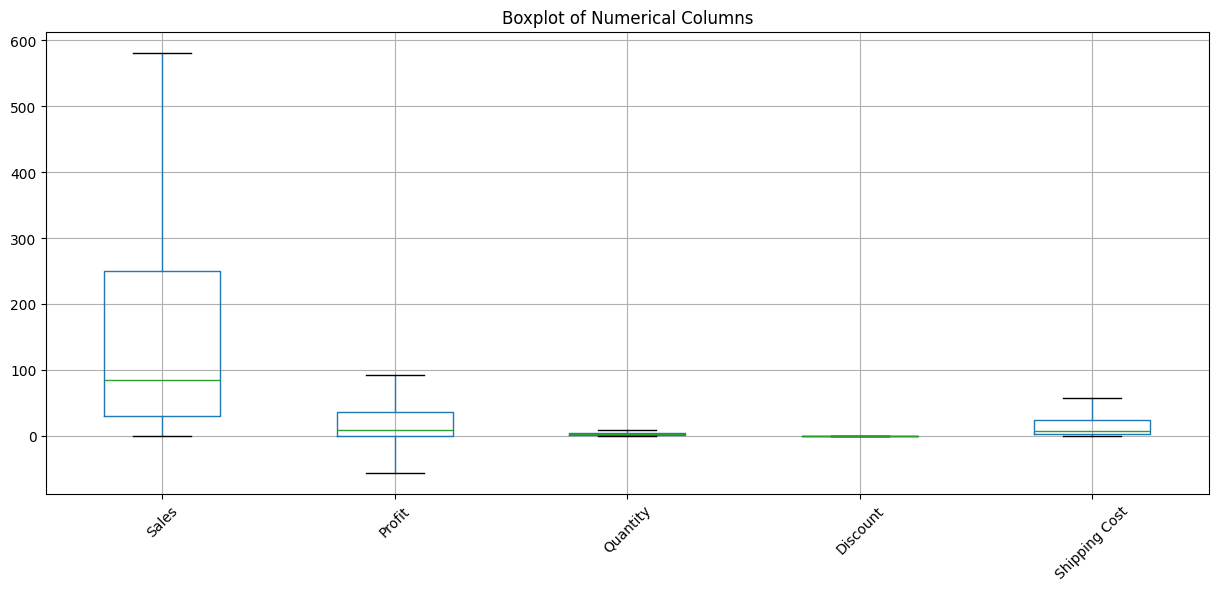

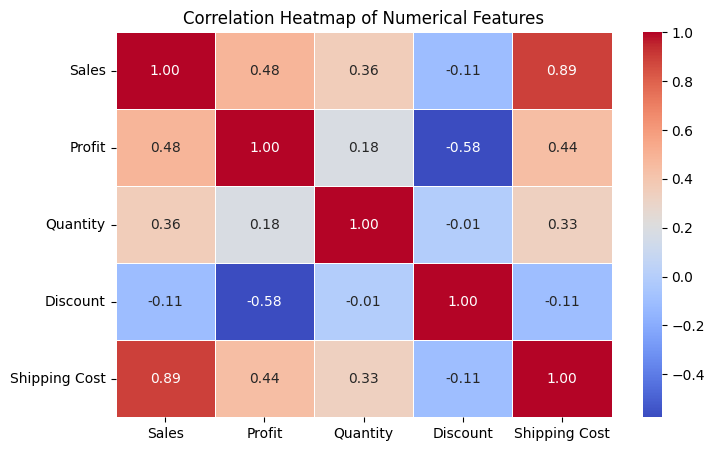

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Global_Superstore2.csv', encoding='latin1')


# Inspect data structure
df.info()
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:", missing_values[missing_values > 0])

# Drop "Postal Code" column due to high missing values
df_cleaned = df.drop(columns=["Postal Code"])

# Check for duplicate rows
duplicate_count = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
print("Duplicates Removed:", duplicate_count)

# Identify numerical columns
numerical_cols = ["Sales", "Profit", "Quantity", "Discount", "Shipping Cost"]

# Detect outliers using IQR
Q1 = df_cleaned[numerical_cols].quantile(0.25)
Q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = ((df_cleaned[numerical_cols] < lower_bound) | (df_cleaned[numerical_cols] > upper_bound)).sum()
print("Outliers Before Capping:", outliers)

# Cap outliers
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Verify outlier handling
outliers_after = ((df_cleaned[numerical_cols] < lower_bound) | (df_cleaned[numerical_cols] > upper_bound)).sum()
print("Outliers After Capping:", outliers_after)

# Compute and display statistical summary
stats_summary = df_cleaned[numerical_cols].describe()
print(stats_summary)

# Visualizing Outliers with Boxplots
plt.figure(figsize=(15, 6))
df_cleaned[numerical_cols].boxplot()
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

# Compute correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
#project 2 

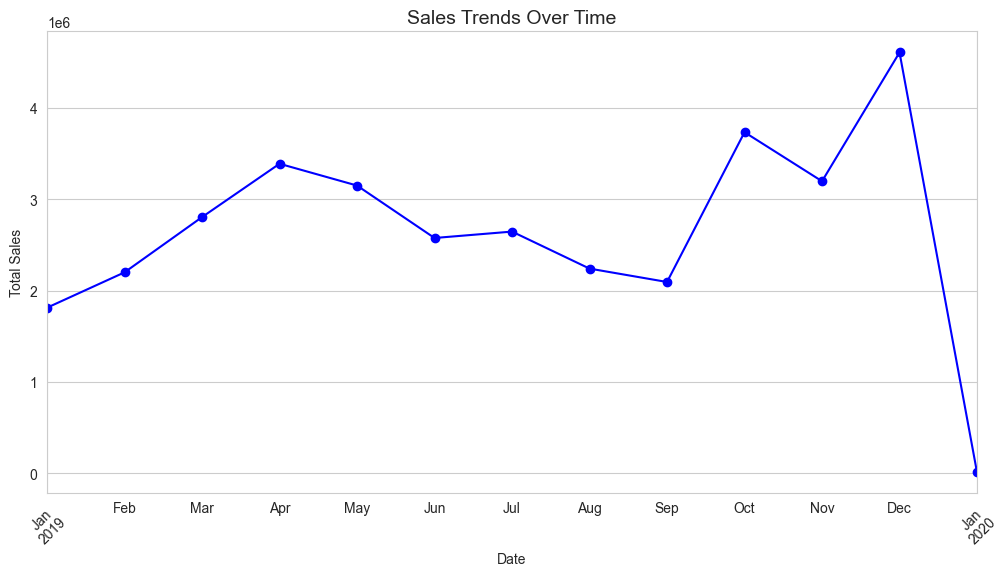

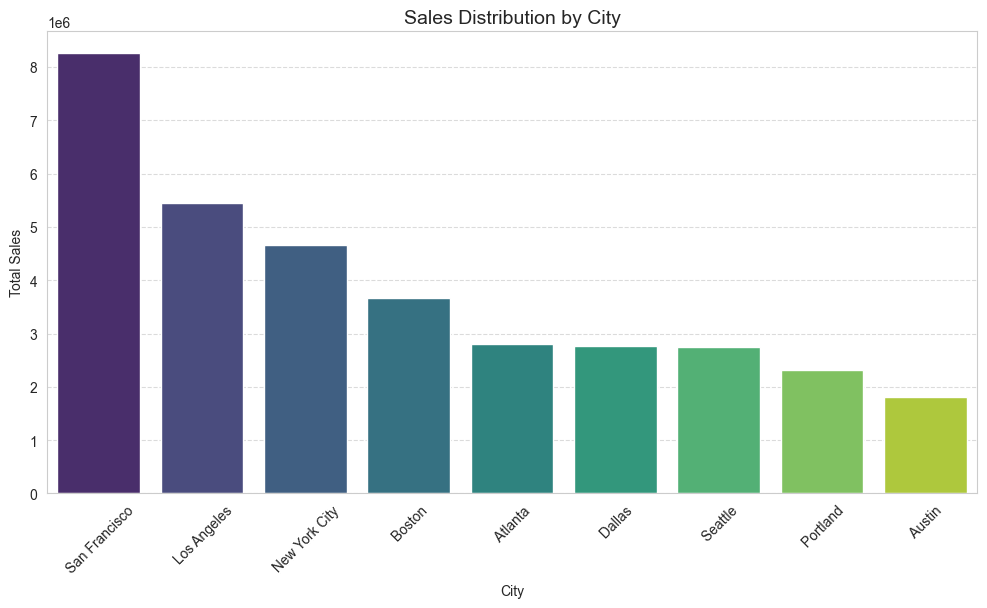

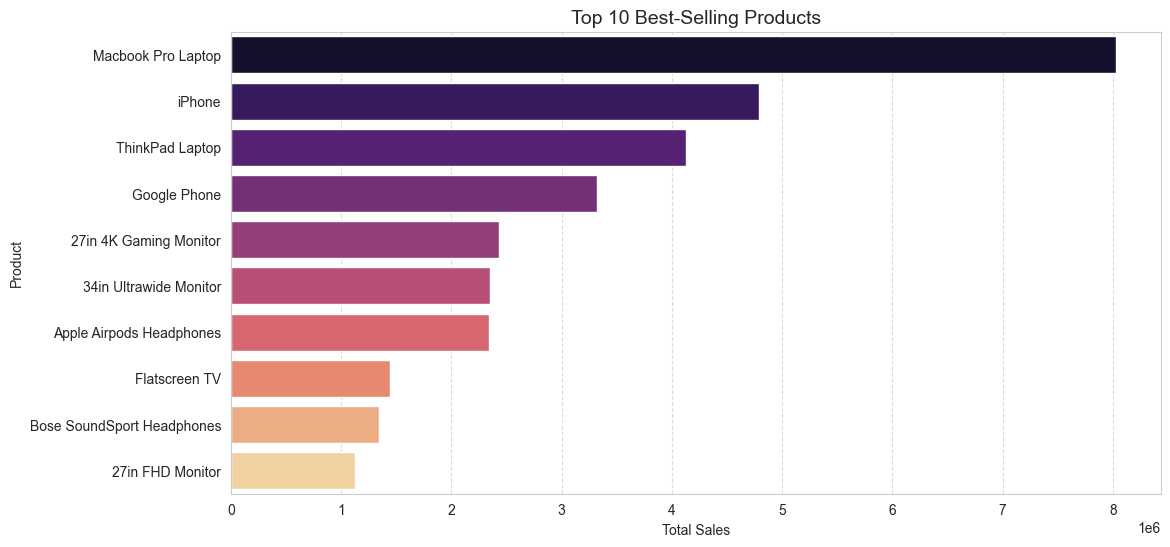

Model Performance:
R² Score: 0.9978
Mean Squared Error: 250.75


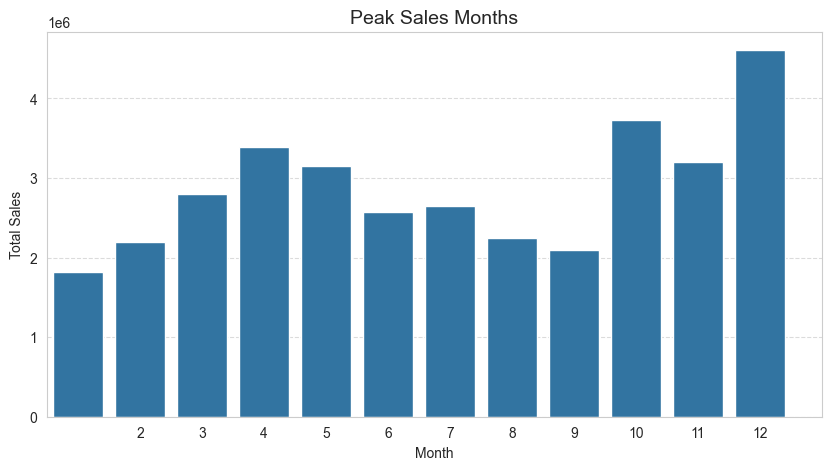

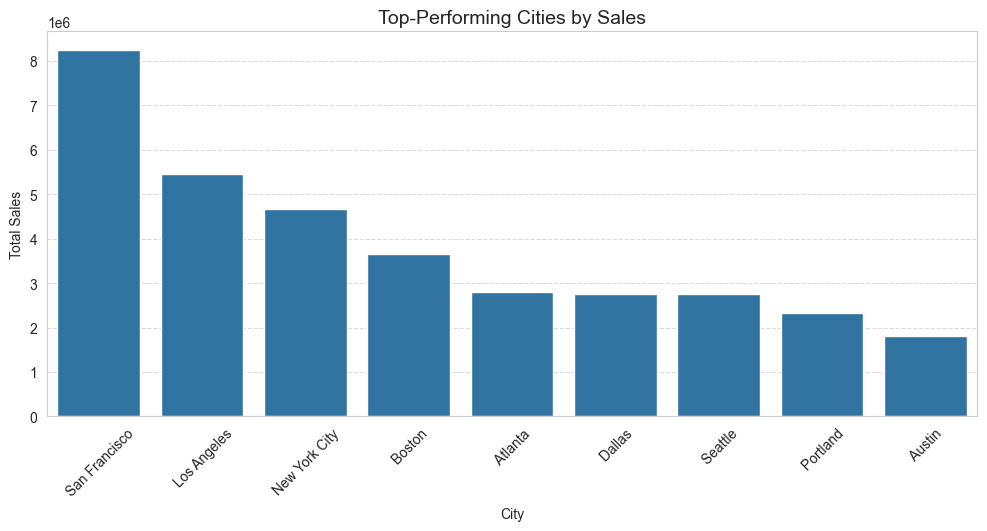

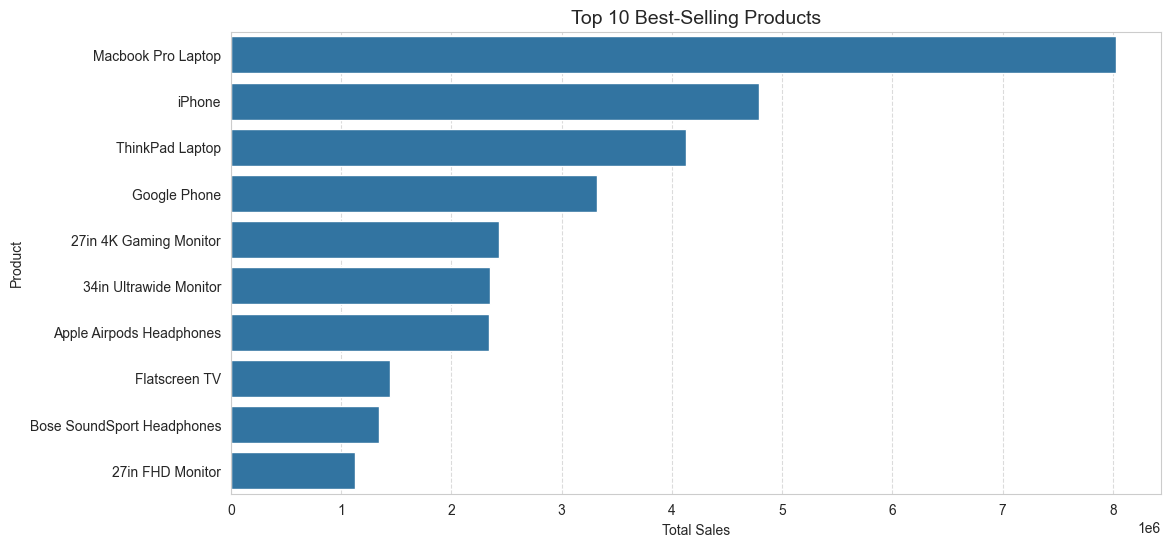


 Peak Sales Months (Highest to Lowest):
 Month
12    4608295.70
10    3734777.86
4     3389217.98
11    3197875.05
5     3150616.23
3     2804973.35
7     2646461.32
6     2576280.15
8     2241083.37
2     2200078.08
9     2094465.69
1     1821413.16
Name: Sales, dtype: float64

 Top-Performing Cities:
 City
San Francisco    8254743.55
Los Angeles      5448304.28
New York City    4661867.14
Boston           3658627.65
Atlanta          2794199.07
Dallas           2765373.96
Seattle          2745046.02
Portland         2319331.94
Austin           1818044.33
Name: Sales, dtype: float64

 Best-Selling Products:
 Product
Macbook Pro Laptop            8032500.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3317400.00
27in 4K Gaming Monitor        2433147.61
34in Ultrawide Monitor        2352898.08
Apple Airpods Headphones      2345550.00
Flatscreen TV                 1443900.00
Bose SoundSport Headphones    1342865.70
27in F

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('Sales Data.csv')

# Drop unnecessary column
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'Order Date' to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

# Exploratory Data Analysis (EDA)
sns.set_style("whitegrid")

# Sales Trend Over Time
df_trend = df.groupby(df["Order Date"].dt.to_period("M")).sum(numeric_only=True)["Sales"]

plt.figure(figsize=(12, 6))
df_trend.plot(marker="o", linestyle="-", color="b")
plt.title("Sales Trends Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Sales Distribution by City
df_city_sales = df.groupby("City").sum(numeric_only=True)["Sales"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_city_sales.index, y=df_city_sales.values, hue=df_city_sales.index, palette="viridis", legend=False)

plt.title("Sales Distribution by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Sales Distribution by Product (Top 10)
df_product_sales = df.groupby("Product").sum(numeric_only=True)["Sales"].sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_product_sales.values, y=df_product_sales.index, hue=df_product_sales.index, palette="magma", legend=False)

plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Predictive Modeling
features = ["Quantity Ordered", "Price Each"]
target = "Sales"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Performance:\nR² Score: {r2:.4f}\nMean Squared Error: {mse:.2f}")

# 1️Calculate Peak Sales Months
monthly_sales = df.groupby("Month")["Sales"].sum().sort_values(ascending=False)

# 2️Calculate Top-Performing Cities
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False)

# 3️ Calculate Best-Selling Products (Top 10)
top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(10)

#  Visualization: Peak Sales Months
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Peak Sales Months", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Visualization: Top-Performing Cities
plt.figure(figsize=(12, 5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title("Top-Performing Cities by Sales", fontsize=14)
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Visualization: Best-Selling Products (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display the calculated values
print("\n Peak Sales Months (Highest to Lowest):\n", monthly_sales)
print("\n Top-Performing Cities:\n", top_cities)
print("\n Best-Selling Products:\n", top_products)
